In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
from shapely.geometry import LineString
import gemgis as gg
import fiona

In [14]:
def read_and_combine_shapefiles(base_folder_path, subfolders):
    gdfs = []

    for folder in subfolders:
        folder_path = os.path.join(base_folder_path, folder)
        # List all files in the folder
        files = os.listdir(folder_path)

        # Filter files that end with ".shp"
        shapefiles = [f for f in files if f.endswith(".shp")]

        # Read each shapefile into a GeoDataFrame
        for shp in shapefiles:
            with fiona.Env(SHAPE_RESTORE_SHX='YES'):
                gdf = gpd.read_file(os.path.join(folder_path, shp))
                gdf['country'] = folder.replace("_roads", "").capitalize()
                gdfs.append(gdf)

    # Check if the list of GeoDataFrames is empty
    if not gdfs:
        print("No shapefiles found in the specified folders.")
        return gpd.GeoDataFrame()

    # Combine all GeoDataFrames into a single GeoDataFrame
    all_data = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

    return all_data

# Example usage:
base_folder_path = "C:\\Users\\chimi\\Desktop\\Python Data Science Projects\\Urban Modeling Project\\Predictive maintenance Model Data\\Roads\\World Bank Data African Countries Road"
subfolders = ['angola_roads','burundi_roads','cameroon_roads', 'ethiopia_roads', 'kenya_roads','southafrica_roads']
combined_data = read_and_combine_shapefiles(base_folder_path, subfolders)


C:\Users\chimi\anaconda3\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


In [15]:
combined_data['geometry']

0        LINESTRING (12.96595 -7.04167, 13.02208 -6.992...
1        LINESTRING (13.59031 -8.58441, 13.57291 -8.565...
2        LINESTRING (13.73075 -7.83081, 13.69675 -7.849...
3        LINESTRING (12.97151 -7.63643, 12.95191 -7.624...
4        LINESTRING (13.70265 -9.28427, 13.69914 -9.270...
                               ...                        
33902    LINESTRING (31.61474 -29.07737, 31.61465 -29.0...
33903    LINESTRING (31.59043 -29.03055, 31.59042 -29.0...
33904    LINESTRING (30.57513 -30.56288, 30.57521 -30.5...
33905    LINESTRING (30.57440 -30.56321, 30.57445 -30.5...
33906    LINESTRING (30.43110 -30.75248, 30.43117 -30.7...
Name: geometry, Length: 33907, dtype: geometry

In [16]:
combined_data.columns

Index(['ET_ID', 'LINKNO', 'ROADNO', 'STARTKM', 'ENDKM', 'LENGTHKM',
       'STARTDESC', 'ENDDESC', 'CLASS', 'REGION', 'WIDTH', 'LANES', 'SURFTYPE',
       'CONDITION', 'AADT', 'PAVEMTYPE', 'COMMENT', 'geometry', 'country',
       'FID', 'OBJECTID', 'UNIFORM_ID', 'ADM2_NAME', 'ADM2_ID', 'ROAD_ID',
       'ROAD_NAME', 'START_NODE', 'END_NODE', 'LINK_NAME', 'RD_TYPE',
       'LOCAL_CLS', 'LENGTH', 'ROAD_WIDTH', 'AADT_CODE', 'AADT_VALUE',
       'SURF_TYPE_', 'SURF_TYPE1', 'ROAD_COND_', 'ROAD_COND1', 'LANE_NB',
       'AICD_REG', 'Shape_len', 'Shape__Len', 'ADM3_NAME', 'ADM3_ID',
       'AADT_SOURC', 'SURF_TYP_1', 'ROAD_CON_1', 'Shape_Leng', 'TAH',
       'CLASSLOC', 'START_KM', 'END_KM', 'STRATDESC', 'ROADCLASS', 'TYPE',
       'iso3', 'WB_Project', 'Kamp_Momba', 'Nairo_Addi', 'PAVETYPE'],
      dtype='object')

In [17]:
# Calculate slope for each country
combined_data.head(5)

,ET_ID,LINKNO,ROADNO,STARTKM,ENDKM,LENGTHKM,STARTDESC,ENDDESC,CLASS,REGION,...,START_KM,END_KM,STRATDESC,ROADCLASS,TYPE,iso3,WB_Project,Kamp_Momba,Nairo_Addi,PAVETYPE
0,NaN,210-02,EN210,0.00,44.24,44.24,CASA DA TELHA,TOMBOCO,Primary,ZAIRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,100-10,EN100,0.00,113.30,113.30,BRIDGE FREITAS MORNA,CAXITO,Primary,BENGO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,220-01,EN220,0.00,81.52,81.52,Ambriz,Bela Vista,Primary,BENGO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,100-08,EN100,0.00,51.58,51.58,N'ZETO,MUSSERRA,Primary,ZAIRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,110-03,EN110,0.00,21.02,21.02,CATETE,CABALA,Primary,BENGO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
combined_data.tail(5)

,ET_ID,LINKNO,ROADNO,STARTKM,ENDKM,LENGTHKM,STARTDESC,ENDDESC,CLASS,REGION,...,START_KM,END_KM,STRATDESC,ROADCLASS,TYPE,iso3,WB_Project,Kamp_Momba,Nairo_Addi,PAVETYPE
33902,NaN,2128,R66,NaN,NaN,NaN,Gingindlovu,Nkwalini,Primary,KwaZulu-Natal,...,0.00,49.00,NaN,NaN,NaN,ZAF,NaN,NaN,NaN,FLEX
33903,NaN,2128,R66,NaN,NaN,NaN,Gingindlovu,Nkwalini,Primary,KwaZulu-Natal,...,0.00,49.00,NaN,NaN,NaN,ZAF,NaN,NaN,NaN,FLEX
33904,NaN,1196,N2,NaN,NaN,NaN,Hibberdene I/C,Mtwalume I/C,Primary,KwaZulu-Natal,...,5.00,14.00,NaN,NaN,NaN,ZAF,NaN,NaN,NaN,FLEX
33905,NaN,1191,N2,NaN,NaN,NaN,Hibberdene I/C,Mtwalume I/C,Primary,KwaZulu-Natal,...,5.00,14.00,NaN,NaN,NaN,ZAF,NaN,NaN,NaN,FLEX
33906,NaN,1187,N2,NaN,NaN,NaN,Marburg,Umtentweni I/C,Primary,KwaZulu-Natal,...,29.00,37.00,NaN,NaN,NaN,ZAF,NaN,NaN,NaN,FLEX


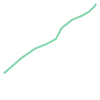

In [19]:
combined_data.loc[0].geometry

In [20]:
combined_data.loc[0].geometry.wkt

'LINESTRING (12.965945581671459 -7.041666075978403, 13.022075298954517 -6.992551618850339, 13.066511337145991 -6.962147432868435, 13.101592424636383 -6.9481147340674925, 13.131996043731727 -6.9317432505434935, 13.150705980972662 -6.896661492679901, 13.183448356632475 -6.870934873483256, 13.216190733397656 -6.856902174670277, 13.237239409768407 -6.845208257985917, 13.255949351614145 -6.826497988780846, 13.2606268387592 -6.819481637435741)'

In [21]:
type(combined_data.loc[0].geometry)

shapely.geometry.linestring.LineString

In [22]:
geometry_types =combined_data.geometry.geom_type

In [23]:
geometry_types.value_counts()

LineString         32879
MultiLineString     1028
dtype: int64

In [24]:
# Filter out multstring
combined_data = combined_data[combined_data.geometry.geom_type == 'LineString']

In [25]:
combined_data.geometry = combined_data.geometry.apply(lambda x: LineString(x.coords) if x.type != 'LineString' else x)

In [26]:
combined_data.geometry.head(7)

0    LINESTRING (12.96595 -7.04167, 13.02208 -6.992...
1    LINESTRING (13.59031 -8.58441, 13.57291 -8.565...
2    LINESTRING (13.73075 -7.83081, 13.69675 -7.849...
3    LINESTRING (12.97151 -7.63643, 12.95191 -7.624...
4    LINESTRING (13.70265 -9.28427, 13.69914 -9.270...
5    LINESTRING (13.63249 -9.12991, 13.63249 -9.072...
6    LINESTRING (13.17833 -8.84399, 13.21336 -8.819...
Name: geometry, dtype: geometry

In [27]:
combined_data['country'].value_counts()

Cameroon       15419
Kenya          13866
Southafrica     1803
Ethiopia        1222
Angola           406
Burundi          163
Name: country, dtype: int64

In [28]:
# Get X and Y coordinates
x_coords = []
y_coords = []


for geometry in combined_data.geometry:
    if isinstance(geometry, LineString):
        x, y = geometry.xy
        x_coords.append(list(x))
        y_coords.append(list(y))

combined_data['X'] = pd.Series(x_coords)
combined_data['Y'] = pd.Series(y_coords)


In [29]:
print(combined_data)

       ET_ID  LINKNO ROADNO  STARTKM  ENDKM  LENGTHKM             STARTDESC  \
0        NaN  210-02  EN210     0.00  44.24     44.24         CASA DA TELHA   
1        NaN  100-10  EN100     0.00 113.30    113.30  BRIDGE FREITAS MORNA   
2        NaN  220-01  EN220     0.00  81.52     81.52                Ambriz   
3        NaN  100-08  EN100     0.00  51.58     51.58                N'ZETO   
4        NaN  110-03  EN110     0.00  21.02     21.02                CATETE   
...      ...     ...    ...      ...    ...       ...                   ...   
33902    NaN    2128    R66      NaN    NaN       NaN           Gingindlovu   
33903    NaN    2128    R66      NaN    NaN       NaN           Gingindlovu   
33904    NaN    1196     N2      NaN    NaN       NaN        Hibberdene I/C   
33905    NaN    1191     N2      NaN    NaN       NaN        Hibberdene I/C   
33906    NaN    1187     N2      NaN    NaN       NaN               Marburg   

              ENDDESC    CLASS         REGION  ... 

In [30]:
# Calculate Slope 
def calculate_slopes(gdf, geometry_col='geometry'):
    """
    Calculates the slope of each segment of a LineString in a GeoDataFrame
    """
    # Check that the input GeoDataFrame has LineString geometries
    if gdf.geom_type[0] != 'LineString':
        raise ValueError('Input GeoDataFrame must contain LineString geometries')

    # Check that the geometry_col parameter points to a valid column
    if geometry_col not in gdf.columns:
        raise ValueError(f'Invalid column name. geometry_col must be a column in the input GeoDataFrame.')

    # Extract the x and y coordinates from the LineString
    x_coords = []
    y_coords = []
    for geom in gdf[geometry_col]:
        x, y = zip(*geom.coords)
        x_coords.extend(x)
        y_coords.extend(y)

    # Calculate the slope for each segment of the LineString
    slopes = []
    for i in range(len(x_coords) - 1):
        x1 = x_coords[i]
        y1 = y_coords[i]
        x2 = x_coords[i+1]
        y2 = y_coords[i+1]
        if x2 - x1 == 0:
            slope = float('inf')
        else:
            slope = (y2 - y1) / (x2 - x1)
        slopes.append(slope)

    # Create a new GeoDataFrame with the slopes as a column
    slope_gdf = gpd.GeoDataFrame(geometry=gdf[geometry_col], data={'slope': slopes})

    return slope_gdf

In [31]:
slopes_gdf = calculate_slopes(combined_data, geometry_col='geometry')

In [32]:
slopes_gdf

,slope,geometry
0,0.88,"LINESTRING (12.96595 -7.04167, 13.02208 -6.992..."
1,0.68,"LINESTRING (13.59031 -8.58441, 13.57291 -8.565..."
2,0.40,"LINESTRING (13.73075 -7.83081, 13.69675 -7.849..."
3,0.54,"LINESTRING (12.97151 -7.63643, 12.95191 -7.624..."
4,1.88,"LINESTRING (13.70265 -9.28427, 13.69914 -9.270..."
...,...,...
15513520,6.94,None
15513521,7.10,None
15513522,6.41,None
15513523,6.09,None


In [33]:
# Drop slope missing values
combined_data['slope'] = slopes_gdf['slope']

In [34]:
slope_df = combined_data[['country','slope','geometry']]

In [35]:
# Check for missing data
slope_df.isnull().sum()

country     0
slope       0
geometry    0
dtype: int64

In [36]:
slope_df.to_csv('countries_slope.csv',index=False)